In [1]:
import numpy as np
import control
from control import matlab
import math
import matplotlib.pyplot as plt
from scipy import linalg as sc_linalg

In [2]:
A = np.array([[-0.75, 1], [-0.3, -0.75]])
B = np.array([[2], [1]])
C = np.array([[1, 2]])
D = np.array([[0]])

In [3]:
sys = control.ss(A, B, C, D)

In [4]:
Wc = matlab.gram(sys, 'c')
print(Wc)
Wo = control.gram(sys, 'o')
print(Wo)

[[3.74879227 0.8115942 ]
 [0.8115942  0.34202899]]
[[0.34202899 0.8115942 ]
 [0.8115942  3.74879227]]


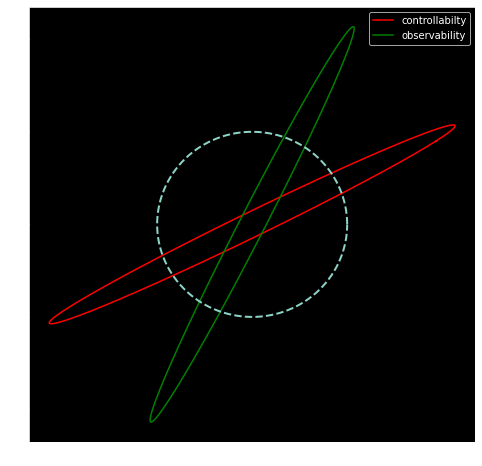

In [5]:
theta = np.arange(0, 2*math.pi, 0.01)
x = [math.cos(inp) for inp in theta]
y = [math.sin(inp) for inp in theta]
cir = [x, y]
ellip_c = np.power(Wc, 0.5)*cir
ellip_o = np.power(Wo, 0.5)*cir
plt.figure(figsize=(8, 8))
plt.style.use('dark_background')
plt.plot(np.array(ellip_c)[0], np.array(ellip_c)[1], 'r')
plt.plot(np.array(ellip_o)[0], np.array(ellip_o)[1], 'g')
plt.plot(x, y, '--', linewidth=2)
plt.legend(['controllabilty', 'observability'])
plt.show()

In [6]:
D, Tu = np.linalg.eig(np.dot(Wc, Wo))
print('sigma2: ', D)
print('Tu: ', Tu)

sigma2:  [3.77888318 0.10287836]
Tu:  [[ 0.9572832 -0.9572832]
 [ 0.289152   0.289152 ]]


In [7]:
sigma_c = np.linalg.multi_dot([np.linalg.inv(Tu), Wc, np.matrix.transpose(np.linalg.inv(Tu))])
sigma_o = np.linalg.multi_dot([np.matrix.transpose(Tu), Wo, Tu])

In [8]:
sigma_s = np.dot(sc_linalg.fractional_matrix_power(sigma_c, 1/4), sc_linalg.fractional_matrix_power(sigma_o, -1/4))
T = np.dot(Tu, sigma_s)
Ti = np.linalg.inv(T)

In [9]:
BWc = np.linalg.multi_dot([Ti, Wc, np.matrix.transpose(np.linalg.inv(T))])
print('BWc: ', BWc)
BWo = np.linalg.multi_dot([np.matrix.transpose(T), Wo, T])
print('BWo: ', BWo)

BWc:  [[ 1.94393497e+00 -2.77555756e-17]
 [ 0.00000000e+00  3.20746566e-01]]
BWo:  [[1.94393497e+00 1.38777878e-16]
 [0.00000000e+00 3.20746566e-01]]


In [10]:
ellip_b = np.linalg.multi_dot([Ti, sc_linalg.fractional_matrix_power(BWc, 1/2), T])*cir

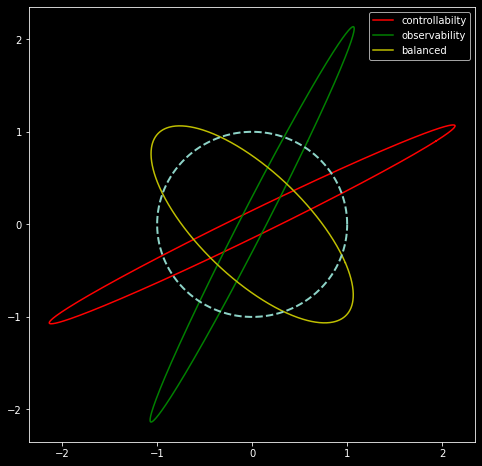

In [11]:
plt.figure(figsize=(8, 8))
plt.style.use('dark_background')
plt.plot(np.array(ellip_c)[0], np.array(ellip_c)[1], 'r')
plt.plot(np.array(ellip_o)[0], np.array(ellip_o)[1], 'g')
plt.plot(np.array(ellip_b)[0], np.array(ellip_b)[1], 'y')
plt.plot(x, y, '--', linewidth=2)
plt.legend(['controllabilty', 'observability', 'balanced'])
plt.show()